##Lets start by connecting with out data storage service. In our case this would be Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
dataframe = pd.read_csv(r"/content/drive/MyDrive/air_pollution_project/air_quality_hourly_data_Colombo_METDept.csv")

##Lets explore the data !

In [ ]:
dataframe.head()

,Unnamed: 0,Time,CO2
0,0,2022-12-21 00:00:00,562
1,1,2022-12-21 01:00:00,511
2,2,2022-12-21 02:00:00,511
3,3,2022-12-21 03:00:00,507
4,4,2022-12-21 04:00:00,498


#### We dont need this "unamed" column. Lets remove it

['Unnamed: 0']: This is a list of column names (in this case, just one column named 'Unnamed: 0') to drop. If you wanted to drop multiple columns, you could include more names in the list.

axis=1: This parameter specifies the axis along which to drop the labels. axis=1 indicates that you want to drop columns. If you wanted to drop rows instead, you would use axis=0.

inplace=True: This parameter specifies whether to modify the original DataFrame directly. If inplace=True, the DataFrame will be updated and the method will return None. If inplace=False (which is the default), a new DataFrame with the specified labels dropped would be returned, and the original DataFrame remains unchanged

In [ ]:
dataframe.drop(['Unnamed: 0'] , axis=1 , inplace = True)

In [ ]:
dataframe

,Time,CO2
0,2022-12-21 00:00:00,562
1,2022-12-21 01:00:00,511
2,2022-12-21 02:00:00,511
3,2022-12-21 03:00:00,507
4,2022-12-21 04:00:00,498
...,...,...
5938,2024-03-21 09:00:00,MF
5939,2024-03-21 10:00:00,MF
5940,2024-03-21 11:00:00,MF
5941,2024-03-21 12:00:00,MF


### Lets analyze our data a bit further

#### Lets look at the shape of our data

In [ ]:
print(f"Dataset Shape: {dataframe.shape}")

Dataset Shape: (5943, 2)


#### Do we have missing data points in our dataset

In [ ]:
print("\nMissing Values Count:")
print(dataframe.isnull().sum())


Missing Values Count:
Time      0
CO2     212
dtype: int64


#### What are the "data types" of our data ?

In Python, the term "object" as a data type is often used to refer to a generic data type that can hold any kind of data. Specifically, in the context of libraries like Pandas, which is commonly used for data analysis, the "object" data type is a flexible type that can store any Python object, including strings, numbers, and other data structures.

When you see "object" as a data type in a DataFrame, it usually means that the data in that column is not of a more specific type like integer, float, or datetime, but rather is being treated as a general-purpose type.

**If a column contains mixed types of data, such as numbers and text, it may also be classified as "object" because Pandas needs a flexible type to accommodate the different data.**

In [ ]:
print("\nData Types:")
print(dataframe.dtypes)


Data Types:
Time    object
CO2     object
dtype: object


#### Should all our datapoint be unique ?

dataframe.nunique() is a pandas method that calculates the number of unique values in each column of the DataFrame.
nunique() returns a Series where the index represents the column names and the values represent the number of unique values in each column.

In [ ]:
print("\nUnique Values per Column:")
print(dataframe.nunique())


Unique Values per Column:
Time    5943
CO2      238
dtype: int64


## Lets Clean our Data !

#### Should we change our orginial Data ?

In [ ]:
dataframe_cleaned = dataframe.copy()

#### Lets remove the rows that have missing values.

In [ ]:
dataframe_cleaned.dropna(inplace=True)

In [ ]:
print("\nMissing Values Count in Cleaned DataFrame:")
print(dataframe_cleaned.isnull().sum())


Missing Values Count in Cleaned DataFrame:
Time    0
CO2     0
dtype: int64


#### Lets start by converting our data to the correct data type

In [ ]:
dataframe_cleaned['CO2'] = pd.to_numeric(dataframe_cleaned['CO2'], errors='coerce')

In [ ]:
dataframe_cleaned['Time'] = pd.to_datetime(dataframe_cleaned['Time'] , format='mixed' , errors='coerce')

#### More missing values ???

In [ ]:
print(dataframe_cleaned.isnull().sum())

Time       0
CO2     2648
dtype: int64


In [ ]:
dataframe_cleaned.dropna(inplace=True)

In [ ]:
print(dataframe_cleaned.isnull().sum())

Time    0
CO2     0
dtype: int64


In [ ]:
print("Data after cleaning :" ,dataframe_cleaned.shape)

Data after cleaning : (3083, 2)


## Let visualize our Data !

### Lets start by plotting our data on a simple line graph

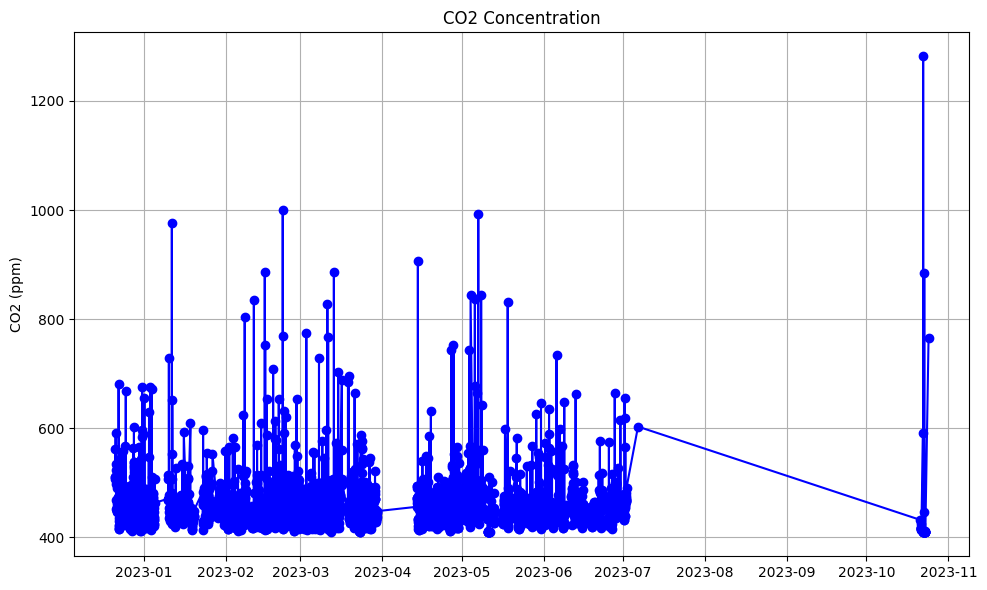

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.plot(dataframe_cleaned['Time'], dataframe_cleaned['CO2'], color='blue', marker='o')
axs.set_title('CO2 Concentration')
axs.set_ylabel('CO2 (ppm)')
axs.grid(True)

plt.tight_layout()
plt.show()

### How do we fix this ?

In [ ]:
dataframe_cleaned['TimeDelta'] = dataframe_cleaned['Time'].diff()

In [ ]:
dataframe_cleaned

,Time,CO2,TimeDelta
0,2022-12-21 00:00:00,562.0,NaT
1,2022-12-21 01:00:00,511.0,0 days 01:00:00
2,2022-12-21 02:00:00,511.0,0 days 01:00:00
3,2022-12-21 03:00:00,507.0,0 days 01:00:00
4,2022-12-21 04:00:00,498.0,0 days 01:00:00
...,...,...,...
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00
3294,2023-10-23 07:00:00,410.0,0 days 01:00:00


In [ ]:
continuous_rows = dataframe_cleaned.copy()
continuous_rows = continuous_rows[continuous_rows['TimeDelta'] == pd.Timedelta(hours=1)]
continuous_rows

,Time,CO2,TimeDelta
1,2022-12-21 01:00:00,511.0,0 days 01:00:00
2,2022-12-21 02:00:00,511.0,0 days 01:00:00
3,2022-12-21 03:00:00,507.0,0 days 01:00:00
4,2022-12-21 04:00:00,498.0,0 days 01:00:00
5,2022-12-21 05:00:00,591.0,0 days 01:00:00
...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00


In [ ]:
continuous_rows['index_diff'] = continuous_rows.index.diff()
continuous_rows

,Time,CO2,TimeDelta,index_diff
1,2022-12-21 01:00:00,511.0,0 days 01:00:00,NaN
2,2022-12-21 02:00:00,511.0,0 days 01:00:00,1.0
3,2022-12-21 03:00:00,507.0,0 days 01:00:00,1.0
4,2022-12-21 04:00:00,498.0,0 days 01:00:00,1.0
5,2022-12-21 05:00:00,591.0,0 days 01:00:00,1.0
...,...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00,1.0
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00,1.0
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00,1.0
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00,1.0


The line `continuous_rows['group'] = (continuous_rows['index_diff'] != 1).cumsum()` is creating a new column called 'group' that assigns a group number to each continuous sequence of rows. Let's break it down step by step:

`continuous_rows['index_diff'] != 1:`

This creates a boolean series where each value is True if the 'index_diff' is not equal to 1, and False otherwise.
Remember, 'index_diff' represents the difference between consecutive row indices. A value of 1 means the rows are consecutive.


.cumsum():

This applies a cumulative sum to the boolean series.
It treats True as 1 and False as 0.



Here's how it works in practice:

For consecutive rows (index_diff == 1):

The condition is False (0)
The cumsum doesn't increase


When there's a gap (index_diff != 1):

The condition is True (1)
The cumsum increases by 1


This increase in the cumsum creates a new group number for the next sequence of consecutive rows.

Let's look at an example:

```shell
index_diff:  [1, 1, 1, 2, 1, 1, 3, 1, 1]
!= 1:        [F, F, F, T, F, F, T, F, F]
cumsum:      [0, 0, 0, 1, 1, 1, 2, 2, 2]
```



In [ ]:
continuous_rows['group'] = (continuous_rows['index_diff'] != 1).cumsum()
continuous_rows

,Time,CO2,TimeDelta,index_diff,group
1,2022-12-21 01:00:00,511.0,0 days 01:00:00,NaN,1
2,2022-12-21 02:00:00,511.0,0 days 01:00:00,1.0,1
3,2022-12-21 03:00:00,507.0,0 days 01:00:00,1.0,1
4,2022-12-21 04:00:00,498.0,0 days 01:00:00,1.0,1
5,2022-12-21 05:00:00,591.0,0 days 01:00:00,1.0,1
...,...,...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00,1.0,123
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00,1.0,123
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00,1.0,123
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00,1.0,123


all consecutive rows get the same group number, and a new group starts whenever there's a break in continuity.

largest_group = continuous_rows['group'].value_counts().idxmax()

This line identifies the group with the most rows, i.e., the largest continuous section. Let's break it down:
a) continuous_rows['group']:

This selects the 'group' column we created earlier.

b) .value_counts():

This counts the occurrences of each unique value in the 'group' column.
It returns a Series where the index is the unique group numbers and the values are their counts.

c) .idxmax():

This finds the index (group number) with the maximum count.
In other words, it identifies the group that appears most frequently.

```Example:
If after grouping we had:
Group 0: 10 rows
Group 1: 15 rows
Group 2: 8 rows
value_counts() would return:
1    15
0    10
2     8
```
And idxmax() would return 1, as that's the group with the most rows.

In [ ]:


largest_group = continuous_rows['group'].value_counts().idxmax()


In [ ]:
largest_group

4

In [ ]:
largest_continuous_data = continuous_rows[continuous_rows['group'] == largest_group]


In [ ]:
largest_continuous_data

,Time,CO2,TimeDelta,index_diff,group
53,2022-12-23 06:00:00,457.0,0 days 01:00:00,3.0,4
54,2022-12-23 07:00:00,463.0,0 days 01:00:00,1.0,4
55,2022-12-23 08:00:00,469.0,0 days 01:00:00,1.0,4
56,2022-12-23 09:00:00,545.0,0 days 01:00:00,1.0,4
57,2022-12-23 10:00:00,442.0,0 days 01:00:00,1.0,4
...,...,...,...,...,...
273,2023-01-01 10:00:00,466.0,0 days 01:00:00,1.0,4
274,2023-01-01 11:00:00,447.0,0 days 01:00:00,1.0,4
275,2023-01-01 12:00:00,431.0,0 days 01:00:00,1.0,4
276,2023-01-01 13:00:00,418.0,0 days 01:00:00,1.0,4


In [ ]:
largest_continuous_data = largest_continuous_data.drop(['index_diff', 'group'], axis=1)

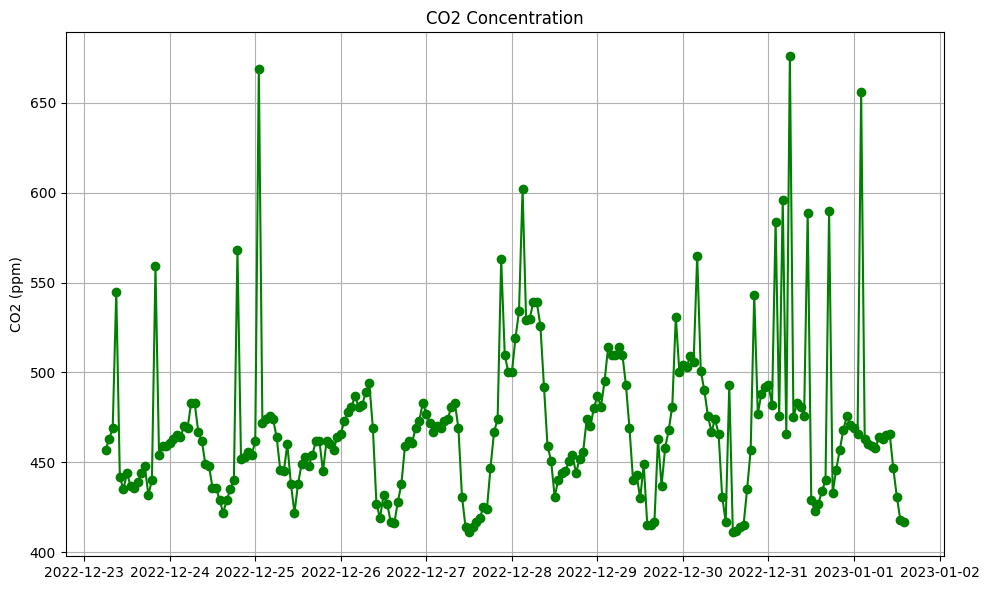

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.plot(largest_continuous_data['Time'], largest_continuous_data['CO2'], color='green', marker='o')
axs.set_title('CO2 Concentration')
axs.set_ylabel('CO2 (ppm)')
axs.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
largest_continuous_data.shape

(225, 3)

In [ ]:
(len(largest_continuous_data)/len(dataframe))*100

3.7859666834931853